In [36]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
Alzheimer_dataset = pd.read_csv("Alzheimer_s_Disease_and_Healthy_Aging_Data_20241121.csv")
Alzheimer_dataset

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE,2022,2022,PA,Pennsylvania,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Native Am/Alaskan Native,POINT (-77.86070029 40.79373015),C05,TMC01,Q03,42,AGE,5064,RACE,NAA
1,BRFSS~2022~2022~46~Q03~TMC01~AGE~RACE,2022,2022,SD,South Dakota,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Asian/Pacific Islander,POINT (-100.3735306 44.35313005),C05,TMC01,Q03,46,AGE,65PLUS,RACE,ASN
2,BRFSS~2022~2022~16~Q03~TMC01~AGE~RACE,2022,2022,ID,Idaho,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-114.36373 43.68263001),C05,TMC01,Q03,16,AGE,65PLUS,RACE,BLK
3,BRFSS~2022~2022~24~Q03~TMC01~AGE~RACE,2022,2022,MD,Maryland,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-76.60926011 39.29058096),C05,TMC01,Q03,24,AGE,65PLUS,RACE,BLK
4,BRFSS~2022~2022~55~Q03~TMC01~AGE~GENDER,2022,2022,WI,Wisconsin,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Male,POINT (-89.81637074 44.39319117),C05,TMC01,Q03,55,AGE,65PLUS,GENDER,MALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284137,BRFSS~2016~2016~55~Q15~TSC02~AGE~RACE,2016,2016,WI,Wisconsin,BRFSS,Screenings and Vaccines,Colorectal cancer screening,Percentage of older adults who had either a ho...,%,...,"Black, non-Hispanic",POINT (-89.81637074 44.39319117),C03,TSC02,Q15,55,AGE,AGE_OVERALL,RACE,BLK
284138,BRFSS~2017~2017~56~Q45~TOC13~AGE~RACE,2017,2017,WY,Wyoming,BRFSS,Overall Health,Fair or poor health among older adults with ar...,Fair or poor health among older adults with do...,%,...,Hispanic,POINT (-108.1098304 43.23554134),C01,TOC13,Q45,56,AGE,5064,RACE,HIS
284139,BRFSS~2015~2015~56~Q42~TCC04~AGE~RACE,2015,2015,WY,Wyoming,BRFSS,Cognitive Decline,Talked with health care professional about sub...,Percentage of older adults with subjective cog...,%,...,Asian/Pacific Islander,POINT (-108.1098304 43.23554134),C06,TCC04,Q42,56,AGE,AGE_OVERALL,RACE,ASN
284140,BRFSS~2019~2019~54~Q46~TOC10~AGE~RACE,2019,2019,WV,West Virginia,BRFSS,Overall Health,"Disability status, including sensory or mobili...",Percentage of older adults who report having a...,%,...,Hispanic,POINT (-80.71264013 38.6655102),C01,TOC10,Q46,54,AGE,65PLUS,RACE,HIS


In [38]:
Alzheimer_dataset.duplicated().sum()

0

In [39]:
Alzheimer_dataset.shape

(284142, 31)

In [40]:
Alzheimer_dataset.info

<bound method DataFrame.info of                                           RowId  YearStart  YearEnd  \
0         BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE       2022     2022   
1         BRFSS~2022~2022~46~Q03~TMC01~AGE~RACE       2022     2022   
2         BRFSS~2022~2022~16~Q03~TMC01~AGE~RACE       2022     2022   
3         BRFSS~2022~2022~24~Q03~TMC01~AGE~RACE       2022     2022   
4       BRFSS~2022~2022~55~Q03~TMC01~AGE~GENDER       2022     2022   
...                                         ...        ...      ...   
284137    BRFSS~2016~2016~55~Q15~TSC02~AGE~RACE       2016     2016   
284138    BRFSS~2017~2017~56~Q45~TOC13~AGE~RACE       2017     2017   
284139    BRFSS~2015~2015~56~Q42~TCC04~AGE~RACE       2015     2015   
284140    BRFSS~2019~2019~54~Q46~TOC10~AGE~RACE       2019     2019   
284141    BRFSS~2015~2015~56~Q02~TNC02~AGE~RACE       2015     2015   

       LocationAbbr   LocationDesc Datasource  \
0                PA   Pennsylvania      BRFSS   
1                

In [41]:
Alzheimer_dataset.describe()

,YearStart,YearEnd,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,LocationID
count,284142.000000,284142.000000,192808.000000,192808.000000,192597.000000,192597.000000,284142.000000
mean,2018.596065,2018.657735,37.676757,37.676757,33.027824,42.595333,800.322677
std,2.302815,2.360105,25.213484,25.213484,24.290016,26.156408,2511.564977
min,2015.000000,2015.000000,0.000000,0.000000,-0.700000,1.300000,1.000000
25%,2017.000000,2017.000000,15.900000,15.900000,12.600000,19.700000,19.000000
50%,2019.000000,2019.000000,32.800000,32.800000,27.000000,38.900000,34.000000
75%,2021.000000,2021.000000,56.900000,56.900000,49.400000,64.600000,49.000000
max,2022.000000,2022.000000,100.000000,100.000000,99.600000,100.000000,9004.000000


In [42]:
Alzheimer_dataset.isnull().sum().sum()

818325

In [43]:
Alzheimer_dataset.isnull().sum()/len(Alzheimer_dataset)*100

RowId                          0.000000
YearStart                      0.000000
YearEnd                        0.000000
LocationAbbr                   0.000000
LocationDesc                   0.000000
Datasource                     0.000000
Class                          0.000000
Topic                          0.000000
Question                       0.000000
Data_Value_Unit                0.000000
DataValueTypeID                0.000000
Data_Value_Type                0.000000
Data_Value                    32.143787
Data_Value_Alt                32.143787
Data_Value_Footnote_Symbol    61.295409
Data_Value_Footnote           61.295409
Low_Confidence_Limit          32.218046
High_Confidence_Limit         32.218046
StratificationCategory1        0.000000
Stratification1                0.000000
StratificationCategory2       12.976962
Stratification2               12.976962
Geolocation                   10.730198
ClassID                        0.000000
TopicID                        0.000000


In [44]:
Alzheimer_dataset = Alzheimer_dataset.drop(["Data_Value"], axis = 1)

In [45]:
Alzheimer_dataset = Alzheimer_dataset.drop(["Data_Value_Alt"], axis = 1)

In [46]:
Alzheimer_dataset = Alzheimer_dataset.drop(["Data_Value_Footnote_Symbol"], axis = 1)

In [47]:
Alzheimer_dataset = Alzheimer_dataset.drop(["Data_Value_Footnote"], axis = 1)

In [48]:
Alzheimer_dataset = Alzheimer_dataset.drop(["Low_Confidence_Limit"], axis = 1)

In [49]:
Alzheimer_dataset = Alzheimer_dataset.drop(["High_Confidence_Limit"], axis = 1)

In [50]:
Alzheimer_dataset.isnull().sum()/len(Alzheimer_dataset)*100

RowId                         0.000000
YearStart                     0.000000
YearEnd                       0.000000
LocationAbbr                  0.000000
LocationDesc                  0.000000
Datasource                    0.000000
Class                         0.000000
Topic                         0.000000
Question                      0.000000
Data_Value_Unit               0.000000
DataValueTypeID               0.000000
Data_Value_Type               0.000000
StratificationCategory1       0.000000
Stratification1               0.000000
StratificationCategory2      12.976962
Stratification2              12.976962
Geolocation                  10.730198
ClassID                       0.000000
TopicID                       0.000000
QuestionID                    0.000000
LocationID                    0.000000
StratificationCategoryID1     0.000000
StratificationID1             0.000000
StratificationCategoryID2     0.000000
StratificationID2             0.000000
dtype: float64

In [51]:
Alzheimer_dataset.dtypes

RowId                        object
YearStart                     int64
YearEnd                       int64
LocationAbbr                 object
LocationDesc                 object
Datasource                   object
Class                        object
Topic                        object
Question                     object
Data_Value_Unit              object
DataValueTypeID              object
Data_Value_Type              object
StratificationCategory1      object
Stratification1              object
StratificationCategory2      object
Stratification2              object
Geolocation                  object
ClassID                      object
TopicID                      object
QuestionID                   object
LocationID                    int64
StratificationCategoryID1    object
StratificationID1            object
StratificationCategoryID2    object
StratificationID2            object
dtype: object

In [61]:
Alzheimer_dataset['StratificationCategory2'].value_counts()

StratificationCategory2
Race/Ethnicity    178431
Gender             68838
Name: count, dtype: int64

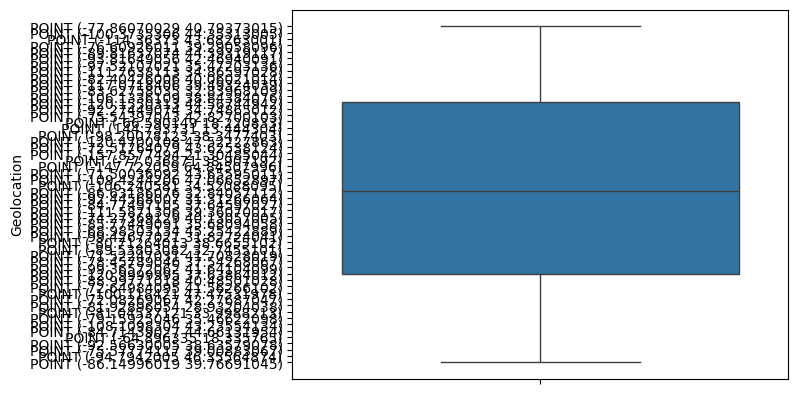

In [63]:
sns.boxplot(y='Geolocation', data = Alzheimer_dataset)
plt.show()

In [69]:
Alzheimer_dataset["StratificationCategory2"]= Alzheimer_dataset["StratificationCategory2"].fillna("Race/Ethnicity")

In [70]:
Alzheimer_dataset["Stratification2"].value_counts()

Stratification2
White, non-Hispanic         36450
Hispanic                    36326
Black, non-Hispanic         35770
Native Am/Alaskan Native    35021
Asian/Pacific Islander      34864
Female                      34596
Male                        34242
Name: count, dtype: int64

In [72]:
Alzheimer_dataset["Stratification2"]= Alzheimer_dataset["Stratification2"].fillna("White, non-Hispanic")

In [74]:
Alzheimer_dataset["Geolocation"]= Alzheimer_dataset["Geolocation"].fillna("POINT (-120.1550313 44.56744942)")

In [75]:
Alzheimer_dataset.isnull().sum()/len(Alzheimer_dataset)*100

RowId                        0.0
YearStart                    0.0
YearEnd                      0.0
LocationAbbr                 0.0
LocationDesc                 0.0
Datasource                   0.0
Class                        0.0
Topic                        0.0
Question                     0.0
Data_Value_Unit              0.0
DataValueTypeID              0.0
Data_Value_Type              0.0
StratificationCategory1      0.0
Stratification1              0.0
StratificationCategory2      0.0
Stratification2              0.0
Geolocation                  0.0
ClassID                      0.0
TopicID                      0.0
QuestionID                   0.0
LocationID                   0.0
StratificationCategoryID1    0.0
StratificationID1            0.0
StratificationCategoryID2    0.0
StratificationID2            0.0
dtype: float64